In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [20]:
general_df = pd.read_csv('../data_export/var_grad_program_cleaned.csv')
school_df = pd.read_csv('../data_export/school_clean.csv')

In [21]:
general_df = general_df.drop(columns=['Unnamed: 0']).rename(columns={
    'SCHOOL_DSTRCT_CD':'School District Code'
})

In [110]:
merged_df = pd.merge(school_df,general_df, on = 'School District Code', how = 'inner')
merged_df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent,LABEL_LVL_1_DESC,PROGRAM_TOTAL,PROGRAM_PERCENT,TOTAL_COUNT
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -ALL Students,220.0,90.16,244.0
1,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Black,54.0,96.43,56.0
2,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Economically Disadvantaged,220.0,90.53,243.0
3,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Female,110.0,90.91,121.0
4,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Hispanic,29.0,93.55,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1814,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -ALL Students,23.0,12.92,178.0
1815,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Black,16.0,11.43,140.0
1816,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Male,18.0,10.91,165.0
1817,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Not Economically Disadvantaged,20.0,14.30,140.0


In [92]:
desc_list = merged_df['LABEL_LVL_1_DESC'].unique()
desc_list = desc_list[1:]


In [114]:
# df_graph = merged_df.loc[merged_df['LABEL_LVL_1_DESC'] == desc_list[0]]
# # df_graph = df_graph.sort_values('PROGRAM_PERCENT', ascending = False)
# # df_graph = df_graph.loc[df_graph['PROGRAM_PERCENT'] != df_graph['PROGRAM_PERCENT'].min()]
# # df_graph = boston_df_o[(z < 3).all(axis=1)]
# # df_graph.plot.line(x = 'PROGRAM_PERCENT', y = 'Percent')

def graph_percent(df, description,indicator):
    df_graph = df.loc[merged_df['LABEL_LVL_1_DESC'] == description]
    z = (stats.zscore(df_graph.loc[:,indicator]))
    df_graph.loc[:,(f'{description}_zscore')] = z
    df_clean = df_graph.loc[(df_graph[f'{description}_zscore']<2) & (df_graph[f'{description}_zscore']>-2)]
    df_clean.sort_values(indicator, ascending = False).plot.scatter(x = indicator, y = 'Percent')
    x_values = df_clean[indicator]
    y_values = df_clean['Percent']
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    plt.plot(x_values, regress_values)
    plt.title(f'{description} vs Percent Enrollment({indicator})')
    plt.ylabel(f'Percent Enrollment')
    print(f'p-value: {pvalue}, std error: {stderr}')


# from sklearn import preprocessing
# df_graph
# x = df_graph[['PROGRAM_PERCENT','Percent']].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled
# df_graph.loc[:,['Program_percent_scaled','Percent_scaled']] = x_scaled
# df_graph.sort_values('Program_percent_scaled', ascending = False).plot.line(x ='Program_percent_scaled', y= 'Percent_scaled' )

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = -0.0x +62.88
p-value: 0.9956323539156077, std error: 0.12231498368553503
y = -0.09x +70.61
p-value: 0.498864756991217, std error: 0.13749363054329636
y = 0.38x +28.21
p-value: 0.01712128680762864, std error: 0.15806695421324027
y = -0.01x +64.0
p-value: 0.9256462278126816, std error: 0.11482101273083559
y = 0.28x +38.83
p-value: 0.0043959673681448225, std error: 0.09667533225590504
y = -0.32x +84.77
p-value: 0.09641239883125552, std error: 0.14699572553387502
y = -0.06x +67.12


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

p-value: 0.41730361015072903, std error: 0.07675282080855776
y = 0.37x +29.58
p-value: 0.0033295599663571147, std error: 0.12403110506781595
y = 0.54x +15.2
p-value: 1.966138559891218e-05, std error: 0.12241794536812808
y = 0.4x +27.66
p-value: 0.02824121815365792, std error: 0.18017470100193939
y = -0.07x +74.09
p-value: 0.7756411184058041, std error: 0.2547883293533075
y = -0.23x +81.37
p-value: 0.02423540353184065, std error: 0.09943199513045298
y = -0.08x +72.59
p-value: 0.42135854309614806, std error: 0.1036518788210701

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra


y = 0.09x +58.19
p-value: 0.6719002068729809, std error: 0.20518995124215253
y = -0.52x +116.91
p-value: 0.10818658422155483, std error: 0.3140408911074261
y = 0.09x +68.37
p-value: 0.8121186578834515, std error: 0.3292570534345423


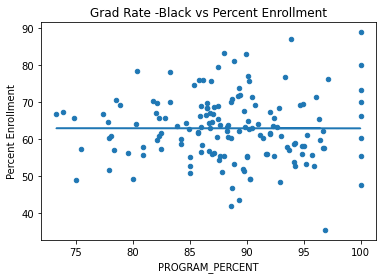

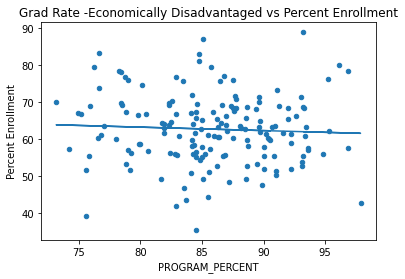

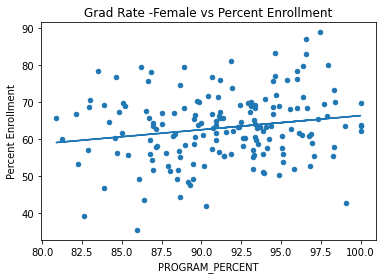

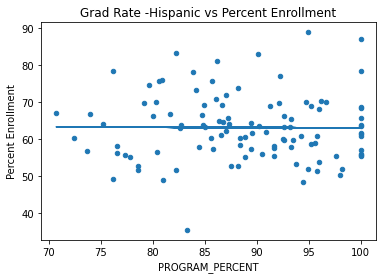

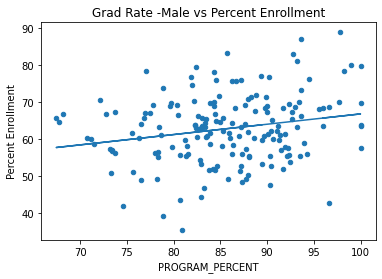

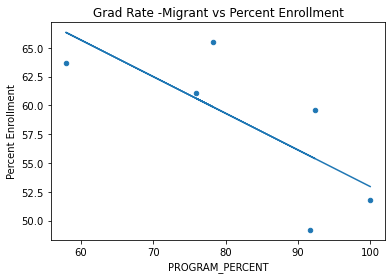

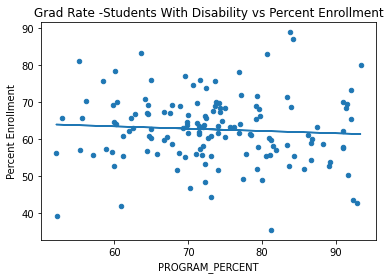

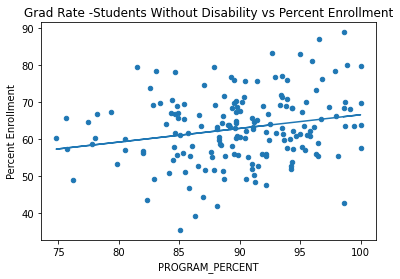

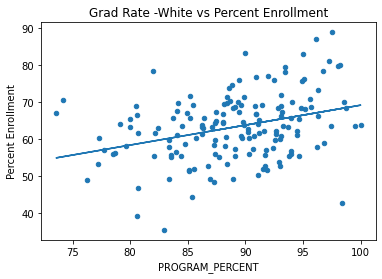

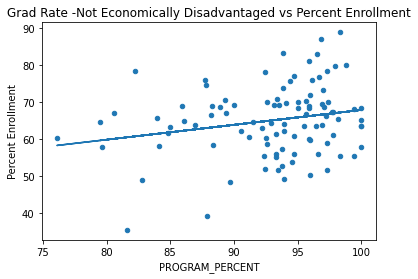

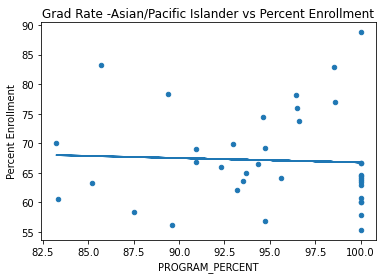

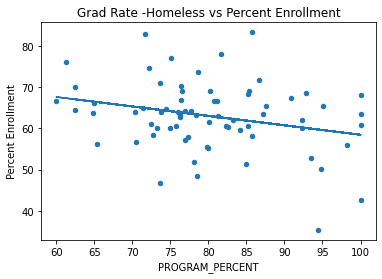

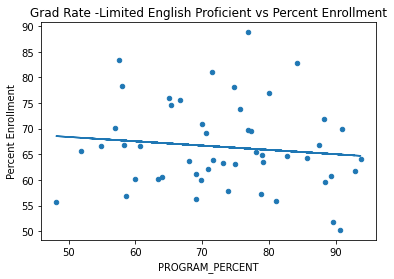

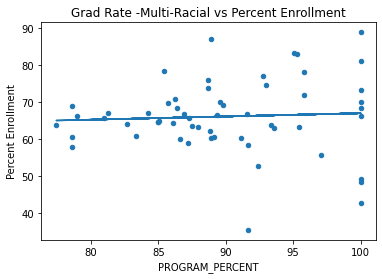

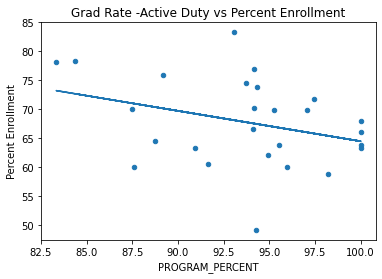

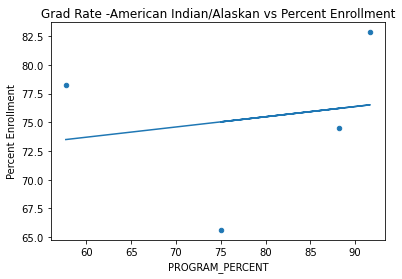

In [115]:
for description in desc_list:
    graph_percent(merged_df,description,'PROGRAM_PERCENT')

In [116]:
merged_df = pd.merge(school_df,general_df, on = 'School District Code', how = 'inner')

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = 0.04x +59.83
p-value: 0.008468752951545176, std error: 0.01343050022971818
y = -0.01x +63.52
p-value: 0.5118608603976178, std error: 0.009269205047520797
y = 0.03x +58.95
p-value: 0.0017610907784488799, std error: 0.008766186622221155
y = 0.06x +60.34
p-value: 0.01967010834864643, std error: 0.02543167737852715
y = 0.03x +58.89
p-value: 0.0036438186157229688, std error: 0.009555596062157183
y = 3.18x +21.47
p-value: 0.7132406739374284, std error: 7.863716122165145


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = 0.11x +59.2
p-value: 0.061889385496049776, std error: 0.058798849794532676
y = 0.02x +58.81
p-value: 0.002109292452379366, std error: 0.0050649490903792406
y = 0.02x +59.58
p-value: 0.014545915867335137, std error: 0.008825757442168588
y = 0.04x +57.95
p-value: 4.0169332308989036e-05, std error: 0.008353782876279563
y = 0.16x +62.02
p-value: 0.04740515366197415, std error: 0.07594579216979463
y = 0.09x +61.5
p-value: 0.4727846072842601, std error: 0.1181580229700659


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = 0.11x +63.58
p-value: 0.2564377041683484, std error: 0.09279336040605325
y = 0.41x +57.0
p-value: 0.006986323576671358, std error: 0.14668651402866428
y = -0.03x +68.46
p-value: 0.6214163226120701, std error: 0.06758361226687479
y = -0.08x +76.33
p-value: 0.9785978735485947, std error: 2.5065096333545545


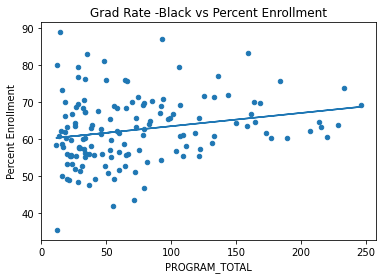

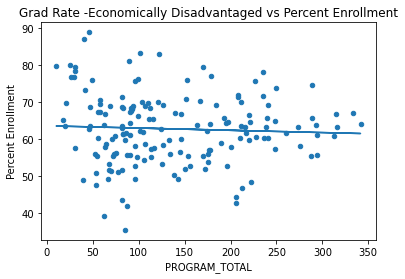

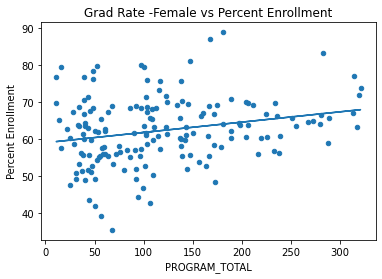

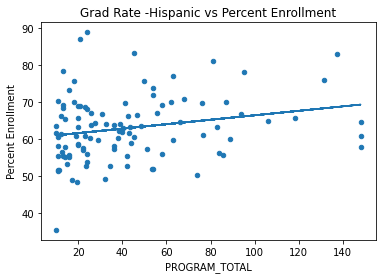

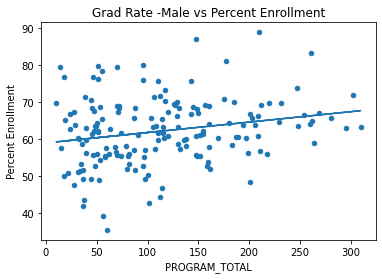

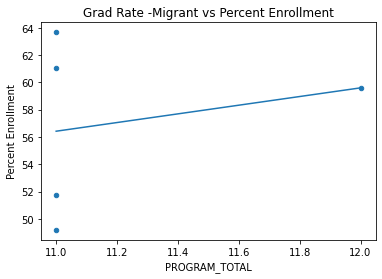

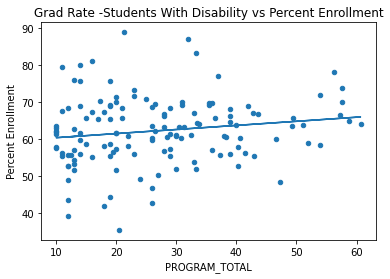

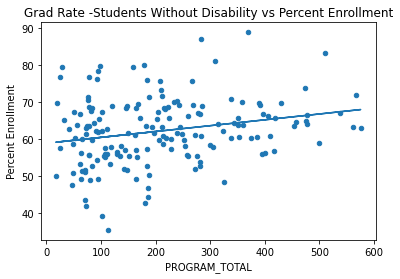

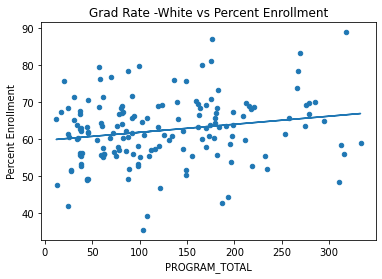

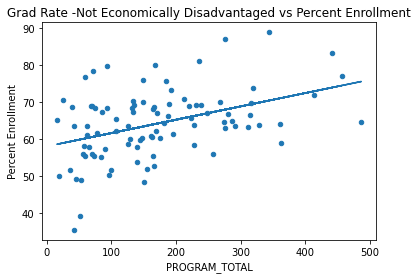

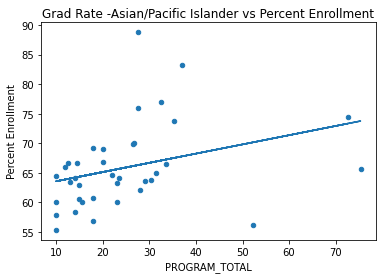

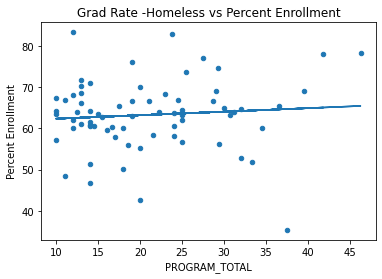

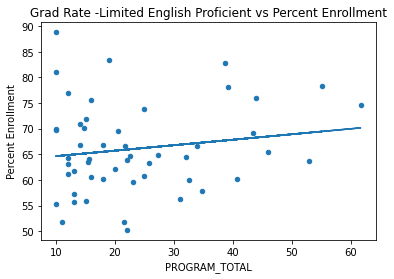

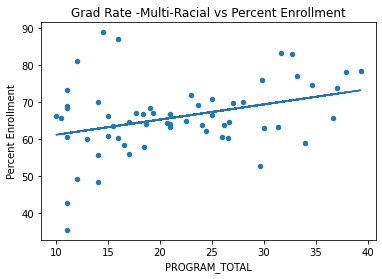

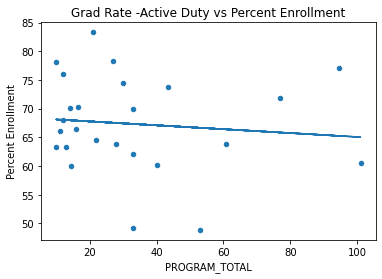

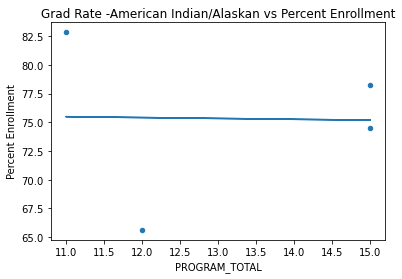

In [117]:
for description in desc_list:
    graph_percent(merged_df,description,'PROGRAM_TOTAL')